# Progress Steps
* So are we going to be rich?
* What is a cross currency?
* Are the times correct for gold?
* Where do I get the data?

* What makes a good prediction?
 * Tomorrows prediction?
 * A few days out?
 * Binary or multiclass?
 * Scoring, Accuracy v precision
 
* Results
 * Prediction over 1 year
 * Predict days in the future [1, 7, 30, 90]
 * Predict k vs one

* Training data
    * Previous [10y, 5y, 2y, 1y, 6m]
    * Retraining
    
* Retraining
 * How does retrianing affect the result?
 * Which windows to use?
 
* Feature selection
1. Daily rates
    1. 5, 30 and 90 day windows

* Comparing classifiers
 * Decision tree
 * SVM
 * Logistic regression
 * NN
 * Ada boost
 

# Just remember.... Start with the simplist model, and add features
## Features
- Daily returns
 - daily_returns[t] = (price[t]/price[-1])-1

## Predictions
1. Will the price stay the same or go up tomorrow. up=1, others=0

## Things I want to find out
- Can we predict gold resonably well
    - What features are corrrelated?
    - What are good features?
    - Do we need lots of them?
- Has trading changed in modern times
    - Has automated trading made things different?
    - Do we overfit if we only look at old data?
    - Was old data correlated to different features that are no longer important?
       
## New quesitions
- Do the dates work correctly?
 - Asuming the day is correct, we use
 - UK Gold 10:30am (GMT)
 - UK Gold 3pm (GMT)
 - FX NYC 12pm (4pm GMT)
  - http://www.federalreserve.gov/pubs/bulletin/2005/winter05_index.pdf

- Score seems kind of high, why?
    - LogarythmicRegression not working
 
- Is the model accurate today?
    - Let's test on the data from the last year

- How long is a model valid before it's predictions don't work?

- Can the model predict further out?

- Are they correct if we retrain every day?

- Can we predict bigger changes rather than just positive?

- What is most important? Acucracy, recall, both?

## Notes discovered
We are only predicting gold against USD. What about the global economy? Do we use a bag of currencies? What are their weightings?



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import helper1 as hlp
dir(hlp)

INFO:root:LOADING Helper1 :-)2016-05-29 16:54:00.639856
INFO:root:fookit, lets see is we can predict


['KFold',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'calc_daily_ret',
 'calc_rolling_averages',
 'create_y_labels',
 'currencies',
 'datetime',
 'download_quandl',
 'draw_info',
 'grid_search',
 'ld',
 'li',
 'load_and_calculate',
 'load_and_prepare_data',
 'logger',
 'logging',
 'os',
 'pd',
 'plt',
 'quandl',
 're',
 'set_date_range',
 'test',
 'test_train',
 'train']

In [3]:
# Kept here incase I need some of this later

# from sklearn.linear_model import LinearRegression
# import numpy as np

# def rolling_linear_regression(df, n, col):
#     def func(indexes, df): 
#         d_tmp = df.loc[indexes]
                
#         X = np.array(range(len(indexes))).reshape([-1, 1])
#         y = d_tmp[col].reshape([-1, 1])
        
#         lr.fit(X, y)
#         result = lr.coef_
        
#         return result
    
#     lr = LinearRegression()
#     result = pd.rolling_apply(df.index.values, n, lambda i: func(i, df))
#     return result

# def rate_of_change(df, n, col):
#     prev = df.shift(n)[col]
#     result = 100 * (df[col] - prev) / prev
#     return result

# def roc_ratio(df, n, col):
#     prev = df.shift(n)[col]
    
    
# for n in [5, 10, 20]:
#     df['lr_%s' % n] = rolling_linear_regression(df, n, 'v')
#     df['roc_%s' % n] = rate_of_change(df, n, 'v')

# df['v'].plot()
# df[['lr_%s' % n for n in [5, 10, 20]]].plot()
# df[['roc_%s' % n for n in [5, 10, 20]]].plot()

## Lets see how it works for the last year

In [12]:
def train_and_test(clf, X, y, train_start, train_end, test_start, test_end, param_grid=None):
    # Get data for training
    X_train = X[train_start: train_end]
    y_train = y[train_start: train_end]

    clf = hlp.train(clf,X_train, y_train, param_grid)
    
    
    X_test = X[test_start: test_end]
    y_test = y[test_start: test_end]
    score = hlp.test(clf, X_test, y_test)
    return score
    

X = hlp.load_and_calculate()
hlp.li(X.columns)
y = hlp.create_y_labels(X['GOLD_dr'], days_ahead=1, threshold=0.0002)
y = y.map({1.0:'U', 2.0:'D'})

import pandas as pd
#print pd.concat([X['GOLD_dr'], X['GOLD_dr'].shift(1), X['GOLD_dr'].shift(2)], axis=1)

cols = X.columns.values
for col in cols:
    if "GOLD_" in col:
        X.drop(col, axis=1, inplace=True)

from sklearn.tree import DecisionTreeClassifier
param_grid={
    'max_depth': range(2,5) + [10, 15],
    'min_samples_split' : [2,10,20]
}
clf = DecisionTreeClassifier()
train_and_test(clf, X, y, '2001-04-01', '2015-06-01','2015-06-01', '2016-09-01', param_grid)

INFO:root:LOADING Helper1 :-)2016-05-29 17:09:04.241606
INFO:root:fookit, lets see is we can predict
INFO:root:Load currencies
INFO:root:Loading file:currencies
INFO:root:Are we using the correct timezone?
INFO:root:inverse currencies so they are all 'how many x does 1 usd buy'
INFO:root:Lets get the gold
INFO:root:Loading file:LBMA_GOLD
INFO:root:Forward fill weekends and holidays
INFO:root:Set date range Dates
INFO:root:Using aa 15 year period of data
INFO:root:calculate daily returns
INFO:root:caluclate rolling averages
INFO:root:Index([u'GOLD_dr', u'JPY_dr', u'AUD_dr', u'GBP_dr', u'NZD_dr', u'CNY_dr',
       u'CAD_dr', u'CHF_dr', u'EUR_dr', u'GOLD_dr_2', u'JPY_dr_2', u'AUD_dr_2',
       u'GBP_dr_2', u'NZD_dr_2', u'CNY_dr_2', u'CAD_dr_2', u'CHF_dr_2',
       u'EUR_dr_2', u'GOLD_dr_7', u'JPY_dr_7', u'AUD_dr_7', u'GBP_dr_7',
       u'NZD_dr_7', u'CNY_dr_7', u'CAD_dr_7', u'CHF_dr_7', u'EUR_dr_7',
       u'GOLD_dr_30', u'JPY_dr_30', u'AUD_dr_30', u'GBP_dr_30', u'NZD_dr_30',
       u'CNY

ValueError: pos_label=1 is not a valid label: array(['D', 'U'], 
      dtype='|S1')

In [123]:
scores = []
for i in [1, 2, 30, 60, 90, 180]:
    hlp.li(i)
    y = hlp.create_y_labels(X['GOLD_dr'], days_ahead=i)
    score = run(X, y, '2001-04-01', '2013-04-01','2013-04-01', '2016-04-01')
    scores.append(score)

# for c in [1, 5, 30, 60]
#     y = hlp.create_y_labels(X['GOLD_dr'])
#     run(X, y, '2001-01-04', '2011-01-04', '2011-01-04', '2016-01-04')

INFO:root:1
INFO:root:Create the y labels vector


(3101, 45)
(3101,)
2    1604
1    1497
Name: GOLD_dr, dtype: int64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

INFO:root:Actual
INFO:root:0.490106544901
INFO:root:             precision    recall  f1-score   support

        1.0       0.60      0.41      0.49       390
        2.0       0.48      0.67      0.56       321

avg / total       0.55      0.53      0.52       711

INFO:root:random sample
INFO:root:0.551282051282
INFO:root:2
INFO:root:Create the y labels vector



(array([ 1.,  2.]), array([267, 444]))
(3101, 45)
(3101,)
2    1604
1    1497
Name: GOLD_dr, dtype: int64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

INFO:root:Actual
INFO:root:0.383045525903
INFO:root:             precision    recall  f1-score   support

        1.0       0.49      0.31      0.38       390
        2.0       0.42      0.61      0.50       321

avg / total       0.46      0.45      0.44       711

INFO:root:random sample
INFO:root:0.54358974359
INFO:root:30
INFO:root:Create the y labels vector



(array([ 1.,  2.]), array([247, 464]))
(3101, 45)
(3101,)
2    1603
1    1498
Name: GOLD_dr, dtype: int64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

INFO:root:Actual
INFO:root:0.574233128834
INFO:root:             precision    recall  f1-score   support

        1.0       0.57      0.58      0.57       404
        2.0       0.43      0.42      0.43       307

avg / total       0.51      0.51      0.51       711

INFO:root:random sample
INFO:root:0.596534653465
INFO:root:60
INFO:root:Create the y labels vector



(array([ 1.,  2.]), array([411, 300]))
(3101, 45)
(3101,)
2    1601
1    1500
Name: GOLD_dr, dtype: int64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

INFO:root:Actual
INFO:root:0.633684210526
INFO:root:             precision    recall  f1-score   support

        1.0       0.56      0.72      0.63       417
        2.0       0.35      0.21      0.26       294

avg / total       0.48      0.51      0.48       711

INFO:root:random sample
INFO:root:0.592326139089
INFO:root:90
INFO:root:Create the y labels vector



(array([ 1.,  2.]), array([533, 178]))
(3101, 45)
(3101,)
2    1605
1    1496
Name: GOLD_dr, dtype: int64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

INFO:root:Actual
INFO:root:0.490984743412
INFO:root:             precision    recall  f1-score   support

        1.0       0.62      0.41      0.49       435
        2.0       0.39      0.61      0.48       276

avg / total       0.53      0.48      0.49       711

INFO:root:random sample
INFO:root:0.602298850575
INFO:root:180
INFO:root:Create the y labels vector



(array([ 1.,  2.]), array([286, 425]))
(3101, 45)
(3101,)
2    1598
1    1503
Name: GOLD_dr, dtype: int64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

INFO:root:Actual
INFO:root:0.0369609856263
INFO:root:             precision    recall  f1-score   support

        1.0       0.56      0.02      0.04       471
        2.0       0.34      0.97      0.50       240

avg / total       0.49      0.34      0.19       711

INFO:root:random sample
INFO:root:0.632696390658



(array([ 1.,  2.]), array([ 16, 695]))


[0.49010654490106542,
 0.38304552590266872,
 0.57423312883435573,
 0.63368421052631574,
 0.49098474341192783,
 0.036960985626283367]

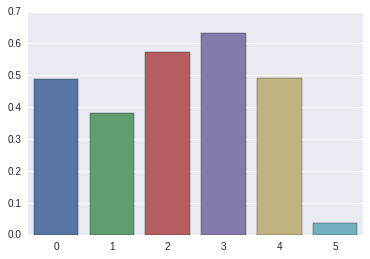

In [124]:
%matplotlib inline  
import seaborn as sns
sns.barplot(x=range(len(scores)), y=scores)
scores